In [1]:
pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
#keras is an neural network API written in python and integrated with Tensorflow

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
#Obtaining MNIST dataset from the keras library
#unpacking the data set into train and test dataset

In [4]:
data=len(X_train)

In [5]:
data

60000

In [6]:
len(X_test)

10000

In [7]:
X_train.shape
#The training data contains 60000 images, and each image is 28 pixels wide and 28 pixels high

(60000, 28, 28)

In [8]:
X_train[0]
#The image intensity ranges from 0 - 255


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

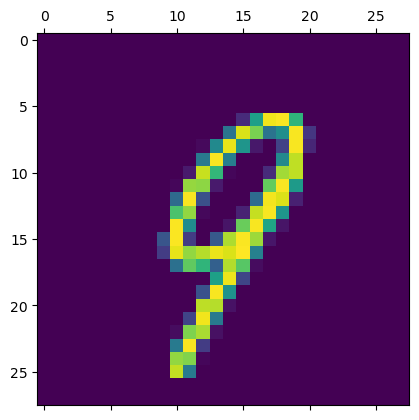

In [9]:
plt.matshow(X_train[22])
# The image in the training dataset is colour image

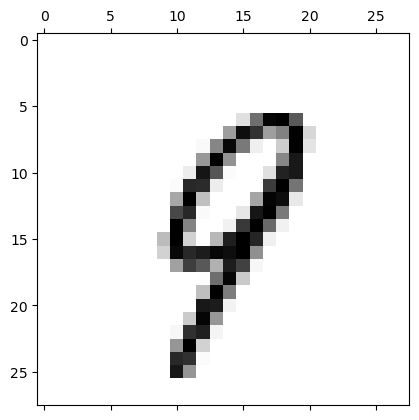

In [10]:
plt.matshow(X_train[22], cmap = plt.cm.binary)
#Convert the dataset colour image into greyscale using matplotlibs build in colourmap

In [11]:
y_train[22]

9

In [12]:
X_train = X_train / 255
X_test = X_test / 255
#Normalisation, then the image intensity ranges from 0 - 1

In [13]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
input_shape=(28,28,1)
#Resizing image for convolution , provide 4D array as input to the CNN, 1 additional dimention for kernel operation

In [14]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPooling2D,Activation
model = Sequential()  #Sequetial - A feedforward neural network

# First Convolution Layer
# 64 -> number of filters, (3,3) -> size of each kernal,
model.add(Conv2D(64, (3,3), input_shape = input_shape)) # For first layer we have to mention the size of input.
model.add(Dense(64,activation=tf.nn.relu)) # Feature map is passed through a nonlinear
                                           #activation function ReLU (Rectified Linear Unit).
model.add(MaxPooling2D(pool_size=(2,2)))
#MaxPooling - For extracting sharp and smooth features. It also reduce variance and computations.

### Second Convolution Layer
model.add(Conv2D(64, (3,3))) #conv2D - using a 2 dimentional CNN.
model.add(Dense(64,activation=tf.nn.relu))  #Dense - A typical layer in model.
model.add(MaxPooling2D(pool_size=(2,2)))


### Third Convolution Layer
model.add(Conv2D(64, (3,3)))
model.add(Dense(64,activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))


### Fully connected layer 1
model.add(Flatten()) #Flatten - For flatten the data for use in the dense layer.
model.add(Dense(64))
model.add(Dense(64,activation=tf.nn.relu))
model.add(Dropout(0.2))  #which makes the neural network more robust, reduce overfitting
### Fully connected layer 2
model.add(Dense(32))
model.add(Dense(32,activation=tf.nn.relu))
model.add(Dropout(0.2))

### Fully connected layer 3
model.add(Dense(10))
model.add(Activation("softmax"))  # last layer Dense (output layer) must be 10 , reprecent the no of classes
#softmax - For class propability


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 dense (Dense)               (None, 26, 26, 64)        4160      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 dense_1 (Dense)             (None, 11, 11, 64)        4160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=X_train,y=y_train)
#train the model
# loss is  the cost function that quantifies the error between the expected and actual outputs.
#  “sparse categorical cross entropy” used as a cost function for multi-class classification model
# mean square error

1875/1875 [==============================] - 60s 31ms/step - loss: 0.3399 - accuracy: 0.8980


In [18]:
model.evaluate(X_test,y_test)
#Evaluating the model with test dataset

313/313 [==============================] - 4s 11ms/step - loss: 0.0861 - accuracy: 0.9748


[0.08612102270126343, 0.9747999906539917]

In [19]:
y_predicted = model.predict(X_test)  # prediction based on softmax propability
y_predicted[22]

313/313 [==============================] - 3s 10ms/step


array([5.12177166e-07, 7.91078492e-07, 8.64680700e-08, 4.06392957e-07,
       2.47228345e-05, 1.17307472e-05, 9.99956131e-01, 1.32187716e-11,
       5.55047927e-06, 1.08651321e-07], dtype=float32)

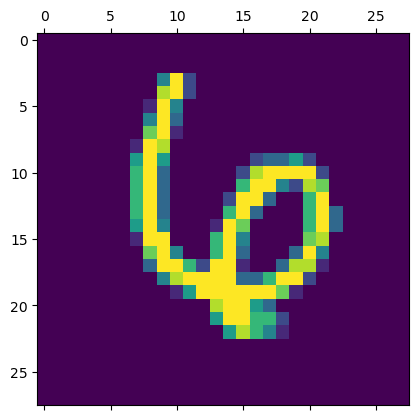

In [20]:
plt.matshow(X_test[22]) # check data

In [21]:
np.argmax(y_predicted[22]) #prediction is same as actual value

6

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_predicted] 

Text(0.5, 14.722222222222216, 'Predicted label')

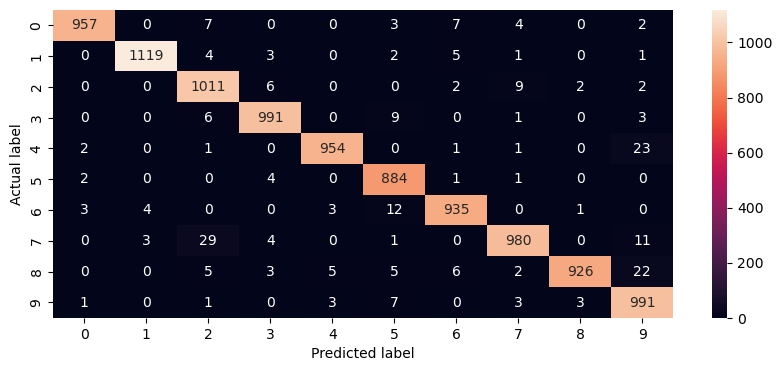

In [23]:
plt.figure(figsize=(10,4))
y_act = pd.Series(y_test, name = 'Actual')
y_pred = pd.Series(y_predicted_labels, name = 'Predicted')
Confusion_matrix = pd.crosstab(y_act, y_pred)
ax = sns.heatmap(Confusion_matrix, annot=True, fmt = "d")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
np.diag(Confusion_matrix) # diagnol element for the confusion matrix

array([ 957, 1119, 1011,  991,  954,  884,  935,  980,  926,  991],
      dtype=int64)

In [25]:
Confusion_matrix.sum()  #  calculating the predictions correct predictions

Predicted
0     965
1    1126
2    1064
3    1011
4     965
5     923
6     957
7    1002
8     932
9    1055
dtype: int64

In [26]:
Confusion_matrix.sum().sum() # total sum of testing images

10000

In [27]:
accuracy = np.diag(Confusion_matrix).sum()/Confusion_matrix.sum().sum()
accuracy
# overoll accuracy from confusion matrix

0.9748